In [1]:
%load_ext jupyter_black
%load_ext autoreload
%autoreload 2

In [2]:
import sys

sys.path.append("..")

## Data understand

O conjunto de dados Avila consiste em características extraídas de 800 imagens da "Bíblia de Avila", uma cópia monumental em latim da Bíblia inteira, produzida durante o século XII entre Itália e Espanha. A análise paleográfica do manuscrito identificou a presença de 12 copistas, cuja distribuição de páginas escritas é desigual.

Cada registro do conjunto de dados é composto por 10 características, correspondendo a um grupo de 4 linhas consecutivas de texto manuscrito. Essas características, rotuladas de F1 a F10, incluem a distância entre colunas, as margens superior e inferior, a exploração, o número da linha, o ratio modular, o espaçamento entre linhas, o peso e o número de picos. Além disso, há uma combinação do ratio modular com o espaçamento entre linhas.

Descrição dos atributos:

| ID   | Name                               |
| ---- | ---------------------------------- |
| F1   | Intercolumnar distance             |
| F2   | Upper margin                       |
| F3   | Lower margin                       |
| F4   | Exploitation                       |
| F5   | Row number                         |
| F6   | Modular ratio                      |
| F7   | Interlinear spacing                |
| F8   | Weight                             |
| F9   | Peak number                        |
| F10  | Modular ratio/interlinear spacing  |
| Class| A, B, C, D, E, F, G, H, I, W, X, Y |


In [3]:
import pandas as pd
from utils.utils import set_seed

set_seed()

In [4]:
import pandas as pd

# Lista com os nomes das colunas
col_names = ["F1", "F2", "F3", 
             "F4", "F5", "F6",
             "F7", "F8", "F9",
             "F10", "Class"]

# Carregamento do dataset com os nomes das colunas
ds_train = pd.read_csv("../data/avila/avila-tr.txt", header=None, names=col_names)

ds_test = pd.read_csv("../data/avila/avila-ts.txt", header=None, names=col_names)

In [5]:
ds_train.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,Class
0,0.266074,-0.165620,0.320980,0.483299,0.172340,0.273364,0.371178,0.929823,0.251173,0.159345,A
1,0.130292,0.870736,-3.210528,0.062493,0.261718,1.436060,1.465940,0.636203,0.282354,0.515587,A
2,-0.116585,0.069915,0.068476,-0.783147,0.261718,0.439463,-0.081827,-0.888236,-0.123005,0.582939,A
3,0.031541,0.297600,-3.210528,-0.583590,-0.721442,-0.307984,0.710932,1.051693,0.594169,-0.533994,A
4,0.229043,0.807926,-0.052442,0.082634,0.261718,0.148790,0.635431,0.051062,0.032902,-0.086652,F


In [6]:
print(ds_train.shape)
print(ds_test.shape)

(10430, 11)
(10437, 11)


Os dados já se encontram normalizados usando o método de Z-Score de normalização, o que é importante para muitos algoritmos de aprendizado de máquina que funcionam melhor ou exigem que as informações estejam em uma escala semelhante.

Os dados também já foram divididos em dois conjuntos: um conjunto de treinamento contendo 10430 amostras e um conjunto de teste contendo 10437 amostras.

### Missing values

In [7]:
from IPython.display import display, Markdown


def display_missing_values(df):
    """
    This function calculates the percentage of missing values in each column of a
    Pandas DataFrame and displays the results in descending order.

    :return: None
    """

    missing_values = df.isnull().sum() / len(df) * 100
    missing_values = missing_values.sort_values(ascending=False)
    missing_values.rename("% Missing Values", inplace=True)
    display(Markdown(missing_values.to_markdown()))
    del missing_values


def unique_values_table(df, uv=3):
    """
    Print a markdown table
    with the col, the number of unique values and the unique values
    list if there are less than 3 unique values (uv) by defalt.

    :param uv: int
    :return: None
    """
    from IPython.display import display, Markdown

    md_table_str = "|Column Name|Unique Values||\n|---|---|---|\n"
    for col_name, unique_values in df.nunique().items():
        if unique_values > uv:
            md_table_str += "|{}|{}|\n".format(col_name, unique_values)
        else:
            md_unique_str = " ".join(
                [
                    f"{name}: {value*100:.2f}\%"
                    for name, value in df[col_name].value_counts(normalize=True).items()
                ]
            )

            md_table_str += "|{}|{}|{}\n".format(col_name, unique_values, md_unique_str)
    display(Markdown(md_table_str))

In [8]:
print("Missing values in the training set:")
display_missing_values(ds_train)

print("Missing values in the test set:")
display_missing_values(ds_test)

Missing values in the training set:


|       |   % Missing Values |
|:------|-------------------:|
| F1    |                  0 |
| F2    |                  0 |
| F3    |                  0 |
| F4    |                  0 |
| F5    |                  0 |
| F6    |                  0 |
| F7    |                  0 |
| F8    |                  0 |
| F9    |                  0 |
| F10   |                  0 |
| Class |                  0 |

Missing values in the test set:


|       |   % Missing Values |
|:------|-------------------:|
| F1    |                  0 |
| F2    |                  0 |
| F3    |                  0 |
| F4    |                  0 |
| F5    |                  0 |
| F6    |                  0 |
| F7    |                  0 |
| F8    |                  0 |
| F9    |                  0 |
| F10   |                  0 |
| Class |                  0 |

Não há missing data em nenhuma variável do nosso dataset.

### Classes Histogram

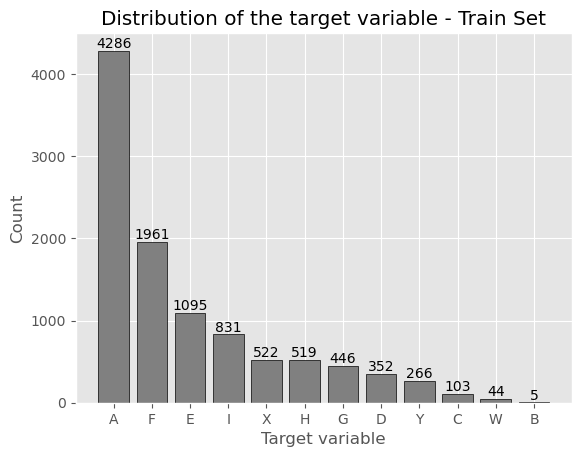

In [9]:
import matplotlib.pyplot as plt

value_counts = ds_train['Class'].value_counts()

plt.style.use('ggplot')

bars = plt.bar(value_counts.index, value_counts.values, color='Gray', edgecolor='black')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + .05, yval, ha='center', va='bottom')

plt.title("Distribution of the target variable - Train Set")
plt.xlabel("Target variable")
plt.ylabel("Count")
plt.show()

Text(0, 0.5, 'Count')

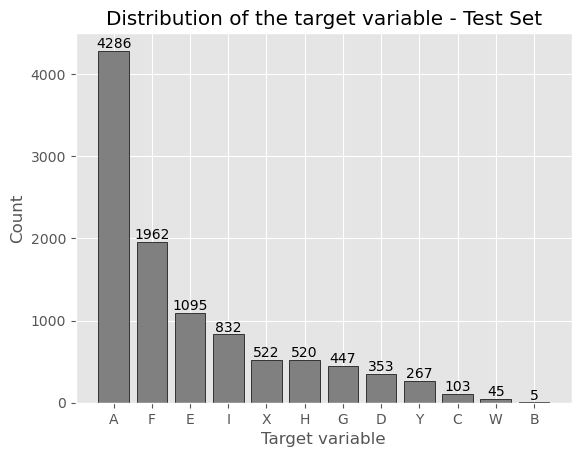

In [10]:
value_counts = ds_test["Class"].value_counts()

bars = plt.bar(value_counts.index, value_counts.values, color='Gray', edgecolor='black')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + .05, yval, ha='center', va='bottom')

plt.title("Distribution of the target variable - Test Set")
plt.xlabel("Target variable")
plt.ylabel("Count")

A avaliação de distribuição nos indica que a separação de dados em treinamento e teste foi feita de forma estratificada, visto que ambos datasets possuem volume similar de dados em cada classe.

Nos nossos dados de treinamento, classe mais numerosa é a classe "A", com 4286 observações, enquanto a classe "B" tem apenas 5 observações. Isso é uma indicação significativa de desbalanceamento de classes, que pode impactar a performance de muitos algoritmos de aprendizado de máquina.

A razão pela qual o desbalanceamento de classes pode ser problemático é porque a maioria dos algoritmos de aprendizado de máquina são projetados para maximizar a precisão geral. Eles tendem a prever preferencialmente a classe majoritária, já que isso aumenta a chance de uma previsão correta. Como resultado, a classe minoritária pode ser frequentemente mal classificada.

Temos várias formas de lidar com este problema de desbalanceamento: 

* Reamostragem: Isso pode ser feito de duas maneiras - sobreamostragem da classe minoritária ou subamostragem da classe majoritária. A sobreamostragem envolve a geração de exemplos sintéticos da classe minoritária, enquanto a subamostragem envolve a remoção de exemplos da classe majoritária.

* Adaptação de algoritmos: Alguns algoritmos permitem a atribuição de pesos diferentes às classes, de modo que a classe minoritária tem um peso maior e, portanto, um impacto maior na função de custo.

* Uso de Métricas melhores: Em vez de usar precisão ou acurácia, outras métricas como a curva ROC AUC, F1 Score e Recall podem ser mais adequadas em casos de classes desbalanceadas.

* Ensembles: Métodos de ensemble, como bagging e boosting, podem ser eficazes em lidar com o desbalanceamento de classes.

### Variables correlation

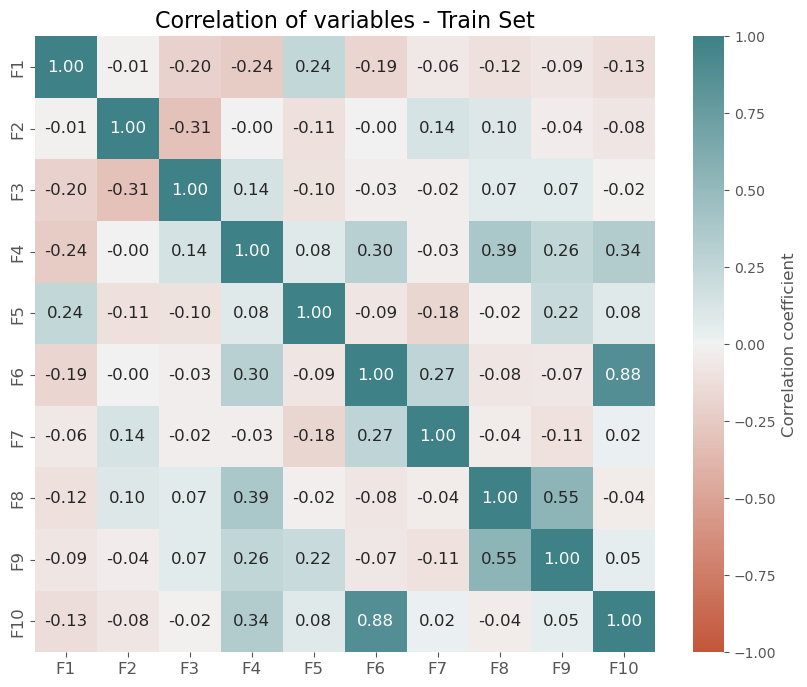

In [11]:
import seaborn as sns

# Define o tamanho da figura
plt.figure(figsize=(10, 8))

# Cria o heatmap
sns.heatmap(
    ds_train[ds_train.columns[:-1]].corr("spearman"), 
    annot=True, 
    fmt=".2f", 
    cmap=sns.diverging_palette(20, 200, as_cmap=True), 
    cbar_kws={'label': 'Correlation coefficient'}, 
    annot_kws={"size": 12},
    vmin=-1,
)

# Ajusta o título
plt.title("Correlation of variables - Train Set", fontdict={'fontsize':16})

# Ajusta os rótulos dos eixos x e y
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Exibe o gráfico
plt.show()


A análisse de correlação das variáveis indica que a F6 apresenta forte correlação positiva com a F10, o que é uma descoberta já esperada, visto que a F10 (Modular ratio/interlinear spacing) é derivada da divisão de F6 (Modular ratio) por F7 (Interlinear spacing).

A presença de uma forte correlação entre essas duas variáveis pode ter implicações para a modelagem. Em alguns modelos, como a regressão linear, a multicolinearidade (ou seja, a alta correlação entre variáveis preditoras) pode ser problemática e interferir muito no funcionamento do modelo. Se formos utilizar usar modelos que captam características lineares, pode ser necessário considerar métodos para lidar com essa alta correlação, como a remoção de uma das variáveis ou a aplicação de técnicas de regularização.